# PREPARATION

In [1]:
# a) Click on JupyterHub File – New – Notebook in the upper left corner of the page button to create a new Notebook Used to save the content of this part of the exercise
# b) Select Kernel for Python 3
# c) As in the previous exercise, modify the notebook File name: ma tplotlib.ipynb
# d) Enter import in the first cell numpy and pandas The statements are used in subsequent exercises and are given new names np. and pd.
# e) At the same time, type import matplotlib.pyplot as plt and %matplotlib inline to reference the libraries required by matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib
exam_data = pd.read_csv("exams.csv")
exam_data.info(), exam_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


(None,
    gender race/ethnicity parental level of education         lunch  \
 0    male        group A                 high school      standard   
 1  female        group D            some high school  free/reduced   
 2    male        group E                some college  free/reduced   
 3    male        group B                 high school      standard   
 4    male        group E          associate's degree      standard   
 
   test preparation course  math score  reading score  writing score  
 0               completed          67             67             63  
 1                    none          40             59             55  
 2                    none          59             60             50  
 3                    none          77             78             68  
 4               completed          78             73             68  )

# DRAW A BAR CHART

gender
female    63.196687
male      69.384913
Name: math score, dtype: float64


<BarContainer object of 2 artists>

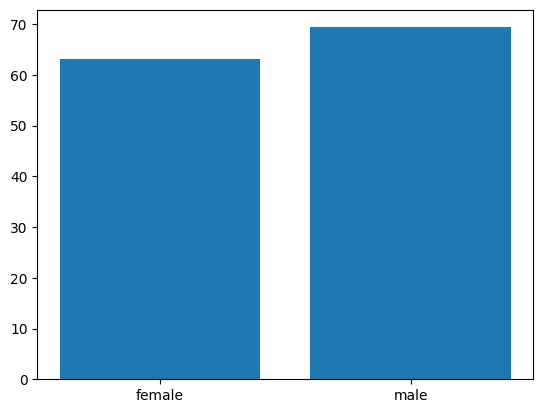

In [2]:
# a) Bar chart are more suitable for displaying aggregated data after grouping. One column represents a certain aspect of value information for a classified data. 
# First, try to plot gender as the grouping key and display the average information of math score. Here you need to use the convergence method in the previous exercise.
# Tip: The aggregated results have their own index and value information, which can be used as the values of the X and Y axes.
gender_math = exam_data.groupby('gender')['math score'].mean()
print(gender_math)
fig, ax = plt.subplots()
ax.bar(gender_math.index, gender_math.values)

gender
female    63.196687
male      69.384913
Name: math score, dtype: float64


[Text(0, 0, '63.1967'), Text(0, 0, '69.3849')]

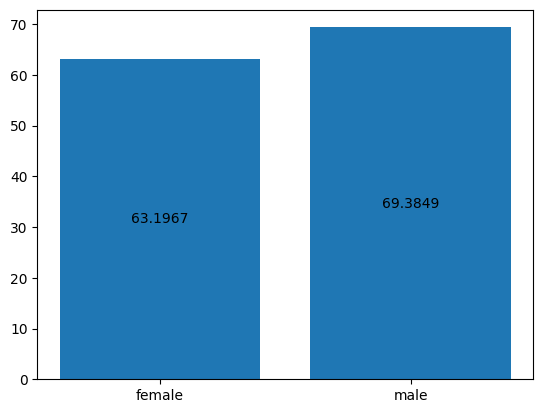

In [3]:
# b) The display of the value of the bar can be set through the
# ax.bar_label method. The first parameter of bar_label is the bar
# subgraph object just created. The label_type parameter can
# specify the position where the numerical value is displayed, such
# as center.
gender_math = exam_data.groupby('gender')['math score'].mean()
print(gender_math)
fig, ax = plt.subplots()
bar = ax.bar(gender_math.index, gender_math.values)
ax.bar_label(bar, label_type='center')

        math score  reading score  writing score
gender                                          
female   63.196687      71.888199      71.708075
male     69.384913      66.305609      64.029014


[Text(0, 0, '71.7081'), Text(0, 0, '64.029')]

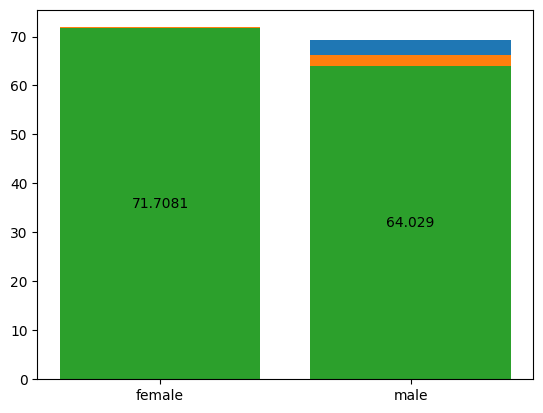

In [4]:
# c) If you want to display all three test scores in bar form at the same
# time, you need to reset the X-axis, because if the previous index
# information is used, the generated images will overlap:
gender_score = exam_data.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
print(gender_score)
fig, ax = plt.subplots()
bar = ax.bar(gender_score.index, gender_score['math score'].values)
bar = ax.bar(gender_score.index, gender_score['reading score'].values)
bar = ax.bar(gender_score.index, gender_score['writing score'].values)
ax.bar_label(bar, label_type='center')

        math score  reading score  writing score
gender                                          
female   63.196687      71.888199      71.708075
male     69.384913      66.305609      64.029014


(0.0, 100.0)

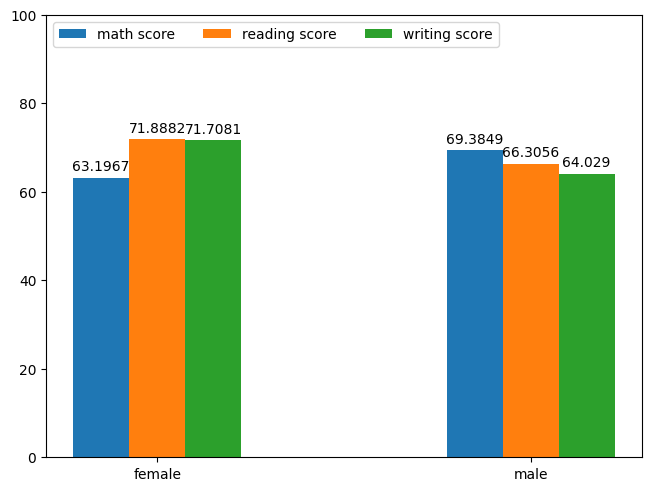

In [5]:
# d) Therefore, you need to adjust the value of the X-axis so that they are displayed side by side without overlapping. 
# At the same time, you need to control the width of the column, and set and adjust the Tick setting of the X-axis. 
# For specific implementation, please refer to: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
gender_score = exam_data.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
print(gender_score)
fig, ax = plt.subplots(layout='constrained')
width = 0.15
multiplier = 0
x = np.arange(len(gender_score))
for attribute, score in gender_score.items():
    offset = width * multiplier
    bar = ax.bar(x + offset, score, width, label=attribute)
    ax.bar_label(bar, padding=3)
    multiplier += 1

ax.set_xticks(x + width, gender_score.index)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100)

gender
female    63.196687
male      69.384913
Name: math score, dtype: float64


[Text(0, 0, '63.1967'), Text(0, 0, '69.3849')]

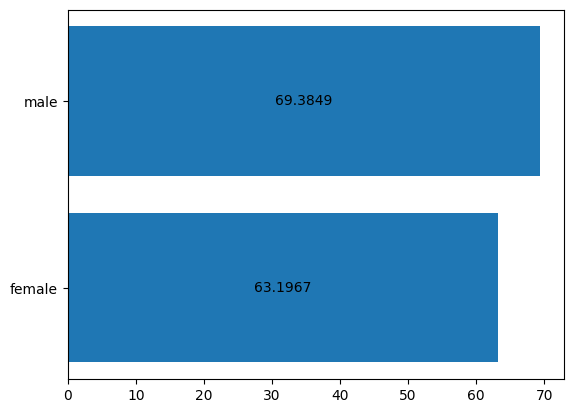

In [6]:
# o) The corresponding exercise of step b can also be displayed
# horizontally. Try to use barh instead of bar to realize the content of
# step b exercise. Note that the parameters of barh are inversely
# related to the parameters of bar: Axes.barh(y, width, height=0.8,
# left=None, *, align='center')
gender_math = exam_data.groupby('gender')['math score'].mean()
print(gender_math)
fig, ax = plt.subplots()
# use barh to replace bar
bar = ax.barh(gender_math.index, gender_math.values)
ax.bar_label(bar, label_type='center')

# DRAW A PIE CHART

([<matplotlib.patches.Wedge at 0x2705d741b50>,
 [Text(1.0662956255575242, 0.27021036049139274, 'group A'),
  Text(0.45895596780613734, 0.9996796584982272, 'group B'),
  Text(-1.0361343511137853, 0.3693583712900187, 'group C'),
  Text(-0.08285939693987755, -1.0968747970204986, 'group D'),
  Text(1.0081526884872605, -0.4400319950820722, 'group E')])

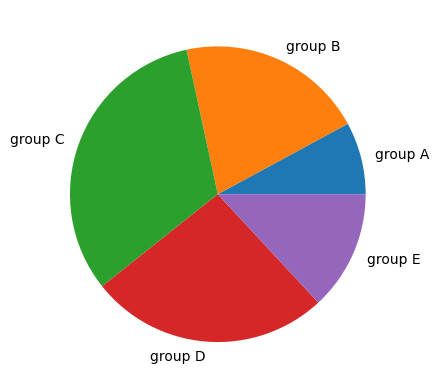

In [7]:
# a) Pie charts are more suitable for displaying the proportion of each grouped data in the overall data. 
# This time you can choose exams " race/ethnicity " in the data to show the number ratio of each group. 
# The name information of each group can be displayed through the label’s information of the pie function.
groupby_race_count = exam_data.groupby('race/ethnicity')['gender'].count()
fig, ax = plt.subplots()
ax.pie(groupby_race_count.values, labels=groupby_race_count.index)

([<matplotlib.patches.Wedge at 0x2705db091c0>,
 [Text(1.0662956255575242, 0.27021036049139274, 'group A'),
  Text(0.45895596780613734, 0.9996796584982272, 'group B'),
  Text(-1.0361343511137853, 0.3693583712900187, 'group C'),
  Text(-0.08285939693987755, -1.0968747970204986, 'group D'),
  Text(1.0081526884872605, -0.4400319950820722, 'group E')],
 [Text(0.5816157957586495, 0.14738746935894148, '7.9%'),
  Text(0.2503396188033476, 0.5452798137263056, '20.5%'),
  Text(-0.5651641915166101, 0.20146820252182834, '32.3%'),
  Text(-0.045196034694478665, -0.5982953438293628, '26.2%'),
  Text(0.5499014664475966, -0.24001745186294843, '13.1%')])

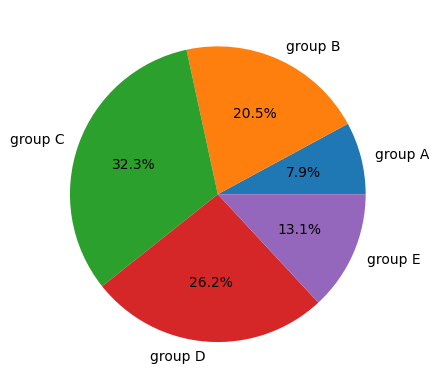

In [8]:
# b) By adding autopct information, you can set the display format of the value of each piece of pie, such as: %.1f%% displays the value with %
groupby_race_count = exam_data.groupby('race/ethnicity')['gender'].count()
fig, ax = plt.subplots()
ax.pie(groupby_race_count.values, labels=groupby_race_count.index, autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x2705d74e090>,
 [Text(1.0662956255575242, 0.27021036049139274, 'group A'),
  Text(0.45895596780613734, 0.9996796584982272, 'group B'),
  Text(-1.0361343511137853, 0.3693583712900187, 'group C'),
  Text(-0.09039206938895733, -1.1965906876587258, 'group D'),
  Text(1.0081526884872605, -0.4400319950820722, 'group E')],
 [Text(0.5816157957586495, 0.14738746935894148, '7.9%'),
  Text(0.2503396188033476, 0.5452798137263056, '20.5%'),
  Text(-0.5651641915166101, 0.20146820252182834, '32.3%'),
  Text(-0.05272870714355844, -0.69801123446759, '26.2%'),
  Text(0.5499014664475966, -0.24001745186294843, '13.1%')])

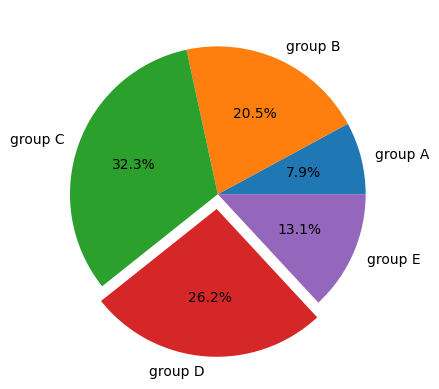

In [9]:
# c) By providing a tuple of information for the explode parameter,
# indicate the information, and highlight ratio of the pie that you want
# to highlight.
groupby_race_count = exam_data.groupby('race/ethnicity')['gender'].count()
fig, ax = plt.subplots()
ax.pie(groupby_race_count.values, labels=groupby_race_count.index, autopct='%.1f%%', explode=(0, 0, 0, 0.1, 0))

([<matplotlib.patches.Wedge at 0x2705d6ce5d0>,
 [Text(1.0662956255575242, 0.27021036049139274, 'group A'),
  Text(0.45895596780613734, 0.9996796584982272, 'group B'),
  Text(-1.0361343511137853, 0.3693583712900187, 'group C'),
  Text(-0.09039206938895733, -1.1965906876587258, 'group D'),
  Text(1.0081526884872605, -0.4400319950820722, 'group E')],
 [Text(0.5816157957586495, 0.14738746935894148, '7.9%'),
  Text(0.2503396188033476, 0.5452798137263056, '20.5%'),
  Text(-0.5651641915166101, 0.20146820252182834, '32.3%'),
  Text(-0.05272870714355844, -0.69801123446759, '26.2%'),
  Text(0.5499014664475966, -0.24001745186294843, '13.1%')])

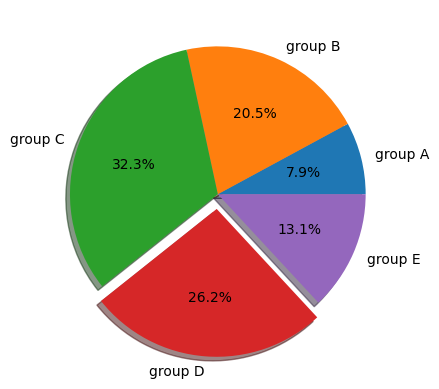

In [10]:
# d) Set shadow to True to achieve shadow effect.
groupby_race_count = exam_data.groupby('race/ethnicity')['gender'].count()
fig, ax = plt.subplots()
ax.pie(groupby_race_count.values, labels=groupby_race_count.index, autopct='%.1f%%', explode=(0, 0, 0, 0.1, 0), shadow=True)

# DRAW A HISTOGRAM

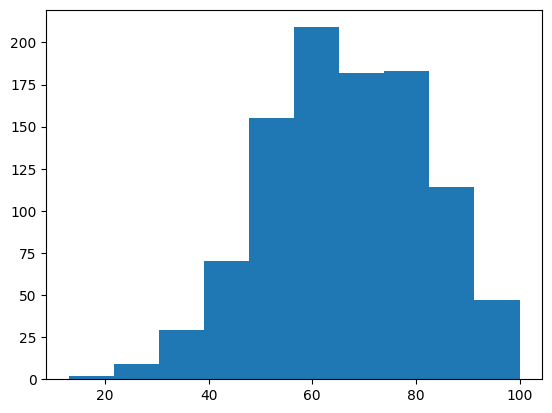

In [11]:
# a) Histograms are somewhat similar to pie charts. They also display grouped data of the overall data. 
# However, the grouping method is not based on categorical data, but on the numerical data itself. 
# It is mainly used to observe the distribution of data (probability distribution). 
# First, implement a simple histogram display based on math score .
fig, ax = plt.subplots()
ax.hist(exam_data['math score'])
plt.show()

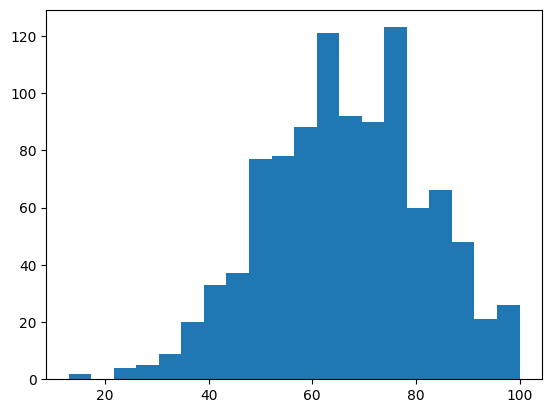

In [12]:
# b) The hist method is divided into 10 bins by default for display. You
# can adjust the desired bin value by setting the value of bins, such
# as 20.
fig, ax = plt.subplots()
ax.hist(exam_data['math score'], 20)
plt.show()

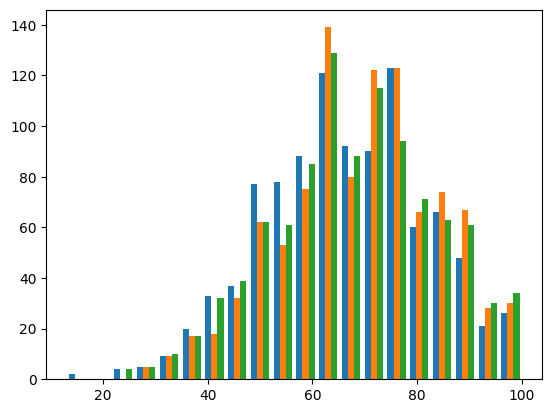

In [13]:
# c) When 3 test scores are provided for hist at the same time, their
# histograms can be displayed together at the same time.
fig, ax = plt.subplots()
ax.hist(exam_data[['math score', 'reading score', 'writing score']], 20)
plt.show()

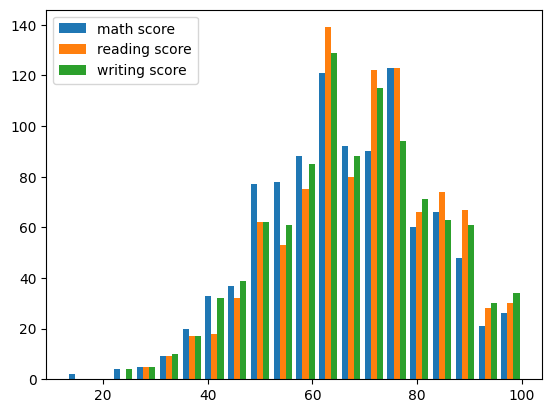

In [14]:
# d) At the same time, by setting label information for hist and adding the legend method, the legend can be displayed.
fig, ax = plt.subplots()
ax.hist(exam_data[['math score', 'reading score', 'writing score']], 20, label=['math score', 'reading score', 'writing score'])
ax.legend()
plt.show()

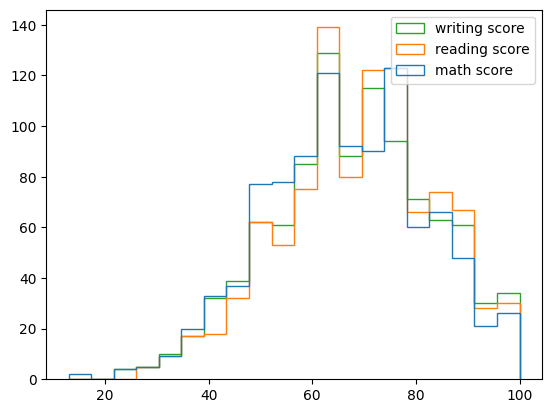

In [15]:
# e) The default type of hist method is bar. You can display histogram data in other ways by modifying histtype to other values, such as step.
fig, ax = plt.subplots()
ax.hist(exam_data[['math score', 'reading score', 'writing score']], bins=20, label=['math score', 'reading score', 'writing score'], histtype='step')
ax.legend(loc='upper right')
plt.show()

In [16]:
# 